# Recall study for real training

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.5)

In [2]:
from network import Protocol, BCPNNFast, NetworkManager
from analysis_functions import calculate_angle_from_history, calculate_winning_pattern_from_distances
from analysis_functions import calculate_patterns_timings, calculate_recall_success
from analysis_functions import calculate_recall_success_sequences, calculate_recall_time_quantities
from plotting_functions import plot_weight_matrix, plot_winning_pattern, plot_network_activity
from plotting_functions import plot_network_activity_angle

## Example

In [72]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
n_patterns = 10

# Manager properties
dt = 0.001
T_recall = 10.0
T_cue = 0.100
n = 1
values_to_save = ['o']
tau_m = 0.020
    
# Protocol
training_time = 0.100
inter_sequence_interval = 0.1
inter_pulse_interval = 0.0
epochs = 3

# Parameters
tau_z_pre = 0.150
g_w = 1.0

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre, tau_p=10.0, g_w=g_w, tau_m=tau_m)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)



In [73]:
manager.nn.g_w = 1.0
manager.nn.g_w_ampa = 1.0

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])
total_time = aux[0]
mean_recall = aux[1]
std_recall = aux[2]
success = aux[3]

In [74]:
print('total time', total_time)
print('mean recall', mean_recall)
print('std recall', std_recall)
print('success', success)

('total time', 1.8570000000000002)
('mean recall', 0.17325000000000002)
('std recall', 0.0051659945799429523)
('success', 100.0)


In [75]:
aux[4]

[(0, 0.20600000000000002, 0.0, 0.20500000000000002),
 (1, 0.17100000000000001, 0.20500000000000002, 0.375),
 (2, 0.17100000000000001, 0.375, 0.54500000000000004),
 (3, 0.17100000000000001, 0.54500000000000004, 0.71499999999999997),
 (4, 0.17100000000000001, 0.71499999999999997, 0.88500000000000001),
 (5, 0.16800000000000001, 0.88500000000000001, 1.052),
 (6, 0.17300000000000001, 1.052, 1.224),
 (7, 0.17500000000000002, 1.224, 1.3980000000000001),
 (8, 0.186, 1.3980000000000001, 1.583),
 (9, 0.26500000000000001, 1.583, 1.847),
 (0, 0.13900000000000001, 1.847, 1.9850000000000001),
 (0, 0.051000000000000004, 1.9930000000000001, 2.0430000000000001),
 (1, 0.013000000000000001, 2.0460000000000003, 2.0579999999999998),
 (1, 0.064000000000000001, 2.0609999999999999, 2.1240000000000001),
 (1, 0.092999999999999999, 2.1270000000000002, 2.2189999999999999),
 (1, 1.2270000000000001, 2.2200000000000002, 3.4460000000000002),
 (1, 0.24299999999999999, 3.4470000000000001, 3.6890000000000001),
 (2, 0.02

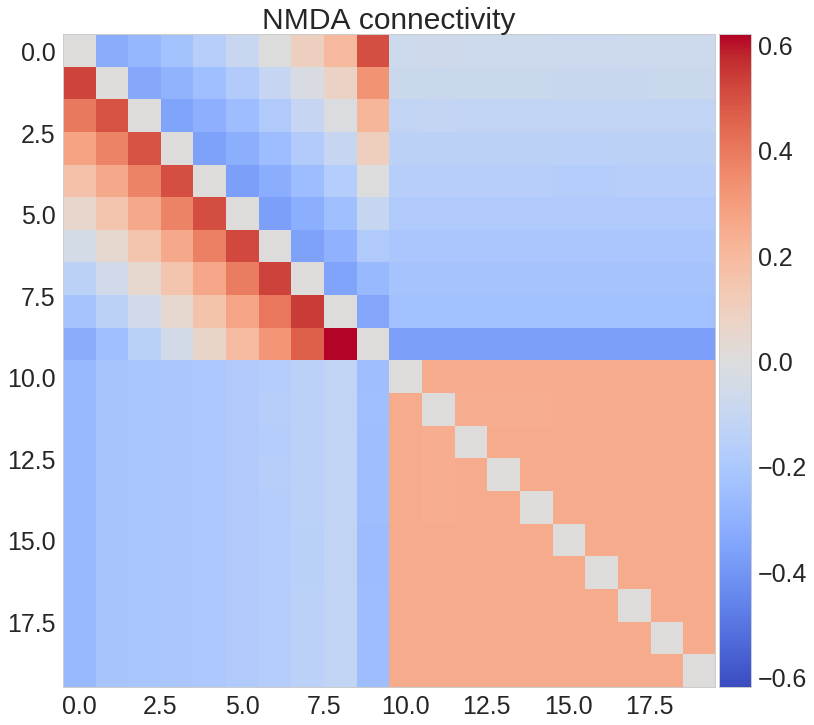

In [52]:
plot_weight_matrix(manager.nn, ampa=False, one_hypercolum=True)

## tau_z

In [68]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
n_patterns = 10

# Manager properties
dt = 0.001
T_recall = 5.0
T_cue = 0.100
n = 1
values_to_save = ['o']
    
# Protocol
training_time = 0.1
inter_sequence_interval = 0.1
inter_pulse_interval = 0.0
epochs = 3

tau_z_vector = np.arange(0.050, 0.550, 0.025)
mean_recall_list = []
total_time_list = []
std_list = []
success_list = []

for tau_z_pre in tau_z_vector:
    print('-----')
    print(tau_z_pre)
    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre, tau_m=0.020, tau_p=10.0)


    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    manager.nn.g_w = 2.5
    aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])
    total_time = aux[0]
    mean_recall = aux[1]
    std_recall = aux[2]
    success = aux[3]
    
    
    # Store
    total_time_list.append(total_time)
    mean_recall_list.append(mean_recall)
    total_time_list.append(total_time)
    std_list.append(std_recall)
    success_list.append(success)

-----
0.05
-----
0.075
-----
0.1
-----
0.125
-----
0.15
-----
0.175
-----
0.2
-----
0.225
-----
0.25
-----
0.275
-----
0.3
-----
0.325
-----
0.35
-----
0.375
-----
0.4
-----
0.425
-----
0.45
-----
0.475
-----
0.5
-----
0.525


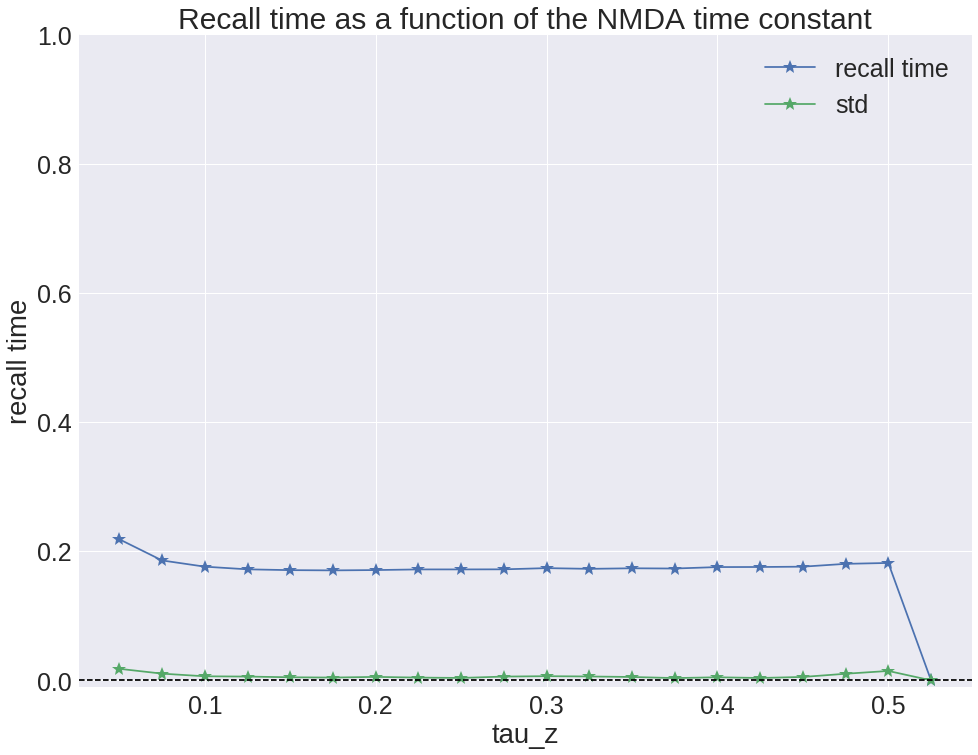

In [70]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ln, = ax.plot(tau_z_vector, mean_recall_list, '*-', markersize=14, label='recall time')
ln, = ax.plot(tau_z_vector, std_list, '*-', markersize=14, label='std')
ax.set_title('Recall time as a function of the NMDA time constant')
ax.set_xlabel(r'$tau_z$')
ax.set_ylabel('recall time')
ax.axhline(0, ls='--', color='black')

ax.set_ylim([-0.01, 1.0])

ax.legend();

In [67]:
std_list

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

## Ampa gain

In [134]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']
    
# Protocol
training_time = 0.1
inter_sequence_interval = 0.1
inter_pulse_interval = 0.0
epochs = 3

tau_z_pre = 0.150

nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre, tau_m=0.020, tau_p=10.0)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)

In [135]:
T_recall = 10.0
T_cue = 0.100
n = 1
g_w_ampa_vector = np.arange(1.0, 6.5, 0.5)

mean_recall_list = []
total_time_list = []
std_list = []
success_list = []
story_list = []

for g_w_ampa in g_w_ampa_vector:
    manager.nn.g_w = 1.0
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = 97.0
    manager.nn.tau_a = 2.7
    
    aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])
    total_time = aux[0]
    mean_recall = aux[1]
    std_recall = aux[2]
    success = aux[3]
    
    # Store
    total_time_list.append(total_time)
    mean_recall_list.append(mean_recall)
    total_time_list.append(total_time)
    std_list.append(std_recall)
    success_list.append(success)
    story_list.append(aux[4])

In [136]:
success_list

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0]

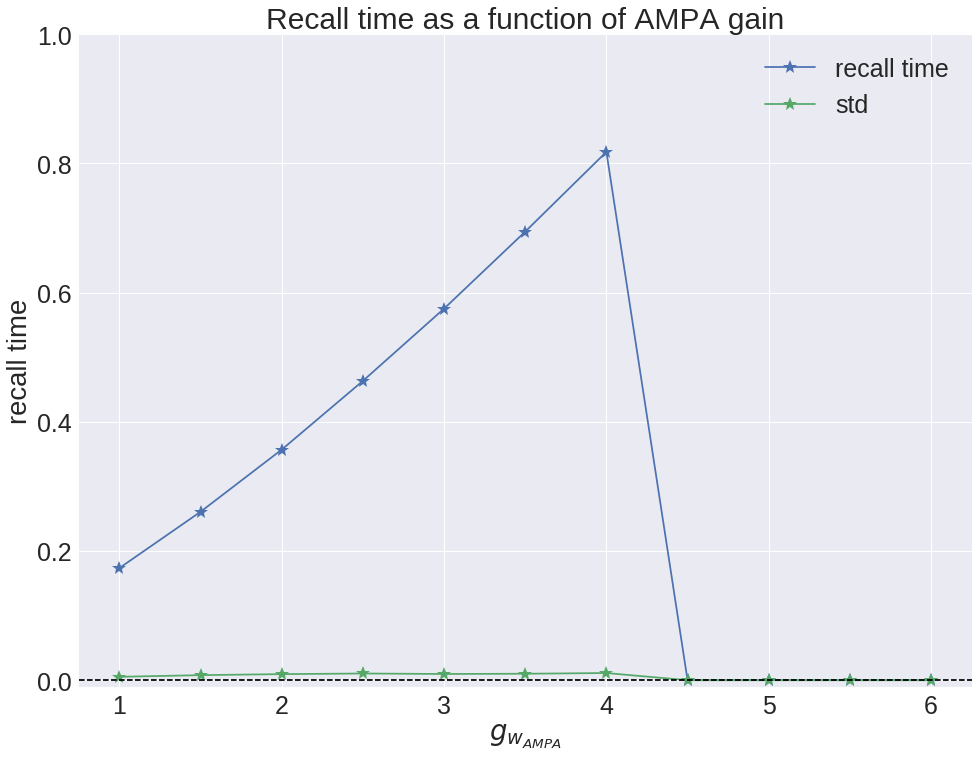

In [137]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ln, = ax.plot(g_w_ampa_vector, mean_recall_list, '*-', markersize=14, label='recall time')
ln, = ax.plot(g_w_ampa_vector, std_list, '*-', markersize=14, label='std')
ax.set_title('Recall time as a function of AMPA gain')
ax.set_xlabel(r'$g_{w_{AMPA}}$')
ax.set_ylabel('recall time')
ax.axhline(0, ls='--', color='black')

ax.set_ylim([-0.01, 1.0])

ax.legend();

## NMDA gain

In [96]:
T_recall = 10.0
T_cue = 0.100
n = 1
g_w_vector = np.arange(1.0, 10.5, 0.5)

mean_recall_list = []
total_time_list = []
std_list = []
success_list = []
story_list = []

for g_w in g_w_vector:
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = 1.0
    manager.nn.g_a = 97.0
    manager.nn.tau_a = 2.7
    
    aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])
    total_time = aux[0]
    mean_recall = aux[1]
    std_recall = aux[2]
    success = aux[3]
    
    # Store
    total_time_list.append(total_time)
    mean_recall_list.append(mean_recall)
    total_time_list.append(total_time)
    std_list.append(std_recall)
    success_list.append(success)
    story_list.append(aux[4])

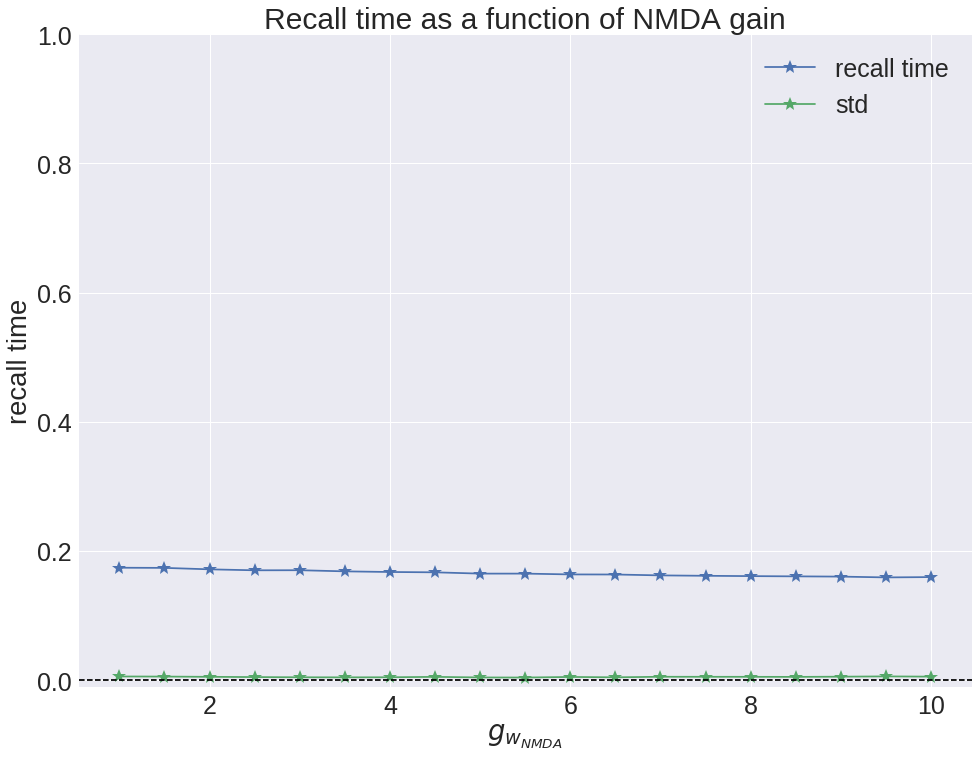

In [97]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ln, = ax.plot(g_w_vector, mean_recall_list, '*-', markersize=14, label='recall time')
ln, = ax.plot(g_w_vector, std_list, '*-', markersize=14, label='std')
ax.set_title('Recall time as a function of NMDA gain')
ax.set_xlabel(r'$g_{w_{NMDA}}$')
ax.set_ylabel('recall time')
ax.axhline(0, ls='--', color='black')

ax.set_ylim([-0.01, 1.0])

ax.legend();

## Adaptation gain

In [114]:
T_recall = 10.0
T_cue = 0.100
n = 1
g_a_vector = np.arange(0, 200, 10.0)

mean_recall_list = []
total_time_list = []
std_list = []
success_list = []
story_list = []

for g_a in g_a_vector:
    manager.nn.g_w = 1.0
    manager.nn.g_w_ampa = 1.0
    manager.nn.g_a = g_a
    manager.nn.tau_a = 2.7
    aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])
    total_time = aux[0]
    mean_recall = aux[1]
    std_recall = aux[2]
    success = aux[3]
    
    # Store
    total_time_list.append(total_time)
    mean_recall_list.append(mean_recall)
    total_time_list.append(total_time)
    std_list.append(std_recall)
    success_list.append(success)
    story_list.append(aux[4])

In [115]:
mean_recall_list

[nan,
 0.93362500000000004,
 0.50800000000000001,
 0.37837500000000002,
 0.31012499999999998,
 0.26850000000000002,
 0.23762500000000003,
 0.21537499999999998,
 0.19662499999999999,
 0.18187500000000001,
 0.170625,
 0.15925,
 0.15125,
 0.14387500000000003,
 0.13725000000000001,
 0.13150000000000001,
 0.12675,
 0.12175,
 0.11787500000000001,
 0.114]

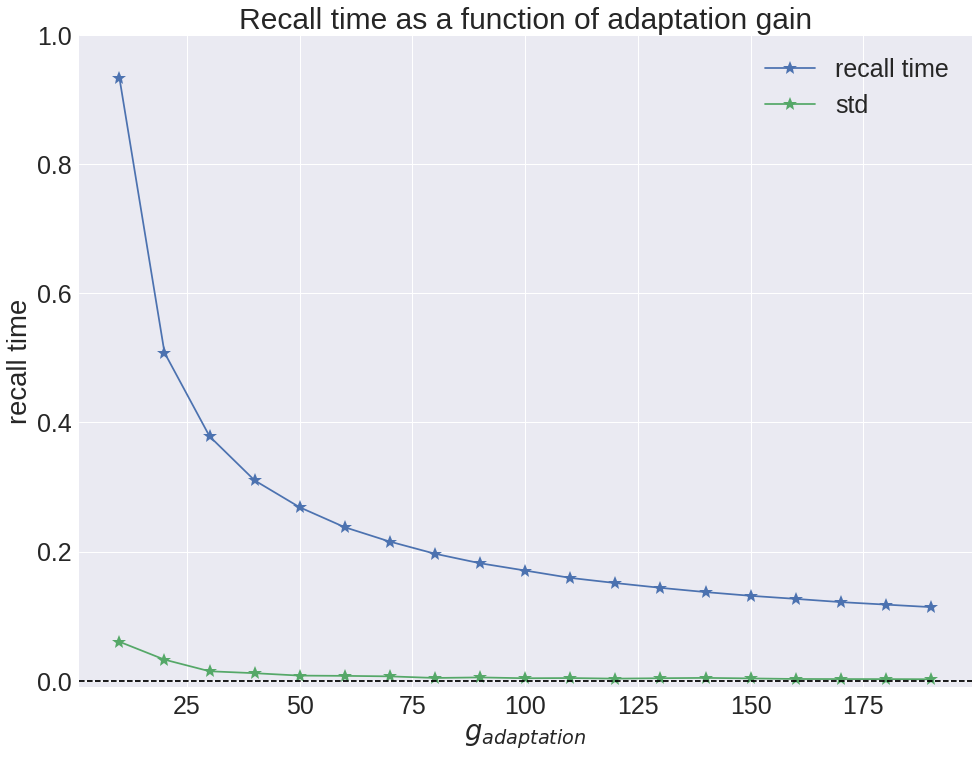

In [116]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ln, = ax.plot(g_a_vector, mean_recall_list, '*-', markersize=14, label='recall time')
ln, = ax.plot(g_a_vector, std_list, '*-', markersize=14, label='std')
ax.set_title('Recall time as a function of adaptation gain')
ax.set_xlabel(r'$g_{adaptation}$')
ax.set_ylabel('recall time')
ax.axhline(0, ls='--', color='black')

ax.set_ylim([-0.01, 1.0])

ax.legend();

In [117]:
T_recall = 10.0
T_cue = 0.100
n = 1
g_a_vector = np.arange(0.0, 10.0, 0.5)

mean_recall_list = []
total_time_list = []
std_list = []
success_list = []
story_list = []

for g_a in g_a_vector:
    manager.nn.g_w = 1.0
    manager.nn.g_w_ampa = 1.0
    manager.nn.g_a = g_a
    manager.nn.tau_a = 2.7
    aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])
    total_time = aux[0]
    mean_recall = aux[1]
    std_recall = aux[2]
    success = aux[3]
    
    # Store
    total_time_list.append(total_time)
    mean_recall_list.append(mean_recall)
    total_time_list.append(total_time)
    std_list.append(std_recall)
    success_list.append(success)
    story_list.append(aux[4])

In [122]:
success_list

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [125]:
mean_recall_list

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 3.3599999999999999,
 2.7125000000000004,
 2.2393333333333332,
 1.9880000000000002,
 1.7190000000000001,
 1.5737999999999999,
 1.45,
 1.3153333333333332,
 1.2207142857142859,
 1.138857142857143,
 1.095375,
 1.0420000000000003,
 0.97187500000000004]

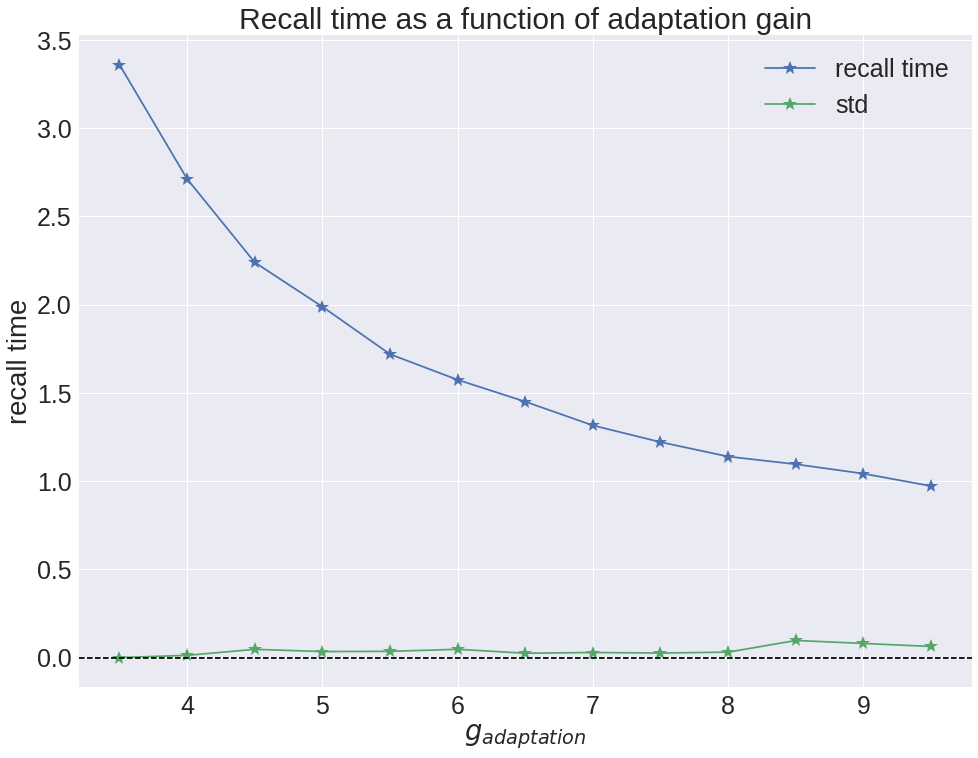

In [123]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ln, = ax.plot(g_a_vector, mean_recall_list, '*-', markersize=14, label='recall time')
ln, = ax.plot(g_a_vector, std_list, '*-', markersize=14, label='std')
ax.set_title('Recall time as a function of adaptation gain')
ax.set_xlabel(r'$g_{adaptation}$')
ax.set_ylabel('recall time')
ax.axhline(0, ls='--', color='black')

#ax.set_ylim([-0.01, 1.0])

ax.legend();

#### Adaptation time constant

In [130]:
T_recall = 10.0
T_cue = 0.100
n = 1
tau_a_vector = np.arange(0.5, 10.5, 0.5)

mean_recall_list = []
total_time_list = []
std_list = []
success_list = []
story_list = []

for tau_a in tau_a_vector:
    manager.nn.g_w = 1.0
    manager.nn.g_w_ampa = 1.0
    manager.nn.g_a = 97.0
    manager.nn.tau_a = tau_a
    aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])
    total_time = aux[0]
    mean_recall = aux[1]
    std_recall = aux[2]
    success = aux[3]
    
    # Store
    total_time_list.append(total_time)
    mean_recall_list.append(mean_recall)
    total_time_list.append(total_time)
    std_list.append(std_recall)
    success_list.append(success)
    story_list.append(aux[4])

In [131]:
success_list

[0.0,
 0.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

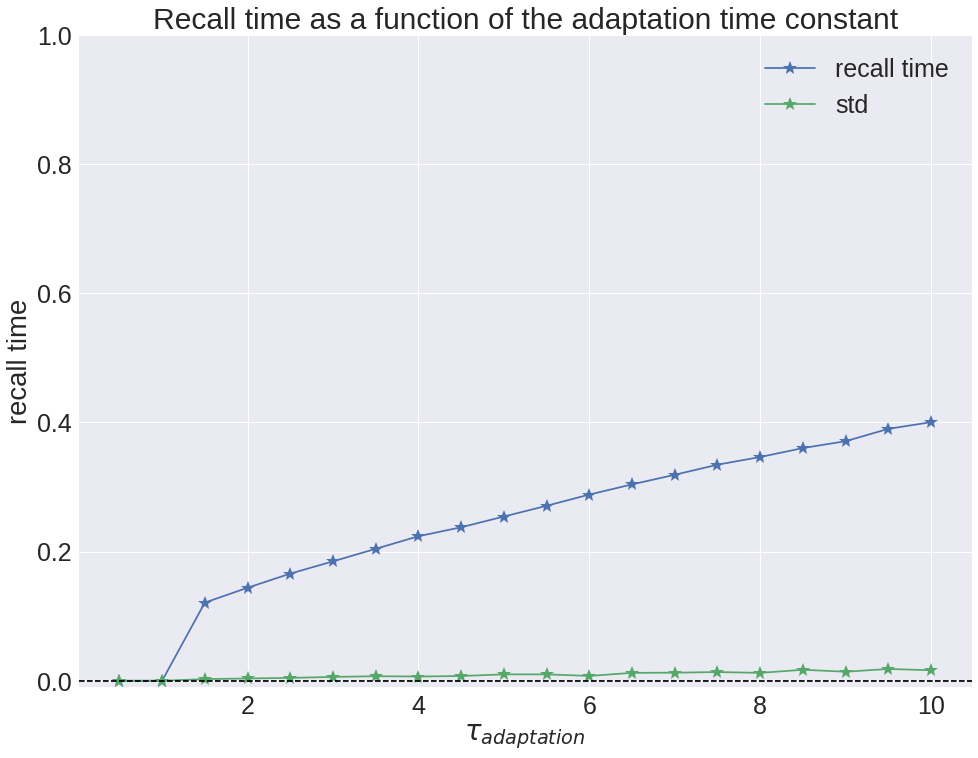

In [132]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ln, = ax.plot(tau_a_vector, mean_recall_list, '*-', markersize=14, label='recall time')
ln, = ax.plot(tau_a_vector, std_list, '*-', markersize=14, label='std')
ax.set_title('Recall time as a function of the adaptation time constant')
ax.set_xlabel(r'$\tau_{adaptation}$')
ax.set_ylabel('recall time')
ax.axhline(0, ls='--', color='black')

ax.set_ylim([-0.01, 1.0])

ax.legend();